# UFO Sightings

The purpose of this notebook is to perform the cleaning and a first analysis of the data extracted from the website https://nuforc.org/. The data extraction process can be seen in my github repository https://github.com/    

## Library and Data Import

In [7]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

import re
from collections import Counter



ufo_df = pd.read_csv("data/nuforc_reports.csv")

## Axuxiliary functions

In [8]:
def remove_pontuaction(text:str):
    """remove all especial caracter from a text, not including white spaces

    Args:
        text (str): a text with 
    """
    regex_pontuaction = r"[^A-Za-z0-9\s]+"
    
    try:
        text = re.sub(regex_pontuaction, "", text)
        return(text)
    except:
        return(text)


In [9]:
def set_duration(word: str):
    """transform a string into a number in seconds, if fails, return 1.

    Args:
        word (str): a string to be transformed into a number in seconds.
    """
    
    # regex to capture the numbers in the string
    regex_number = r"[0-9]+\.?[0-9]*"
    # regex to capture key words in the string
    regex_word = r"[SseveralmMany]{4, 8}"

    # The default valor of the duration.
    number = 1

    # If the encounter number in the duration return the mean 
    if re.search(regex_number, word):
        numbers = re.findall(regex_number, word)
        numbers = [float(x) for x in numbers]
        number = np.mean(numbers)
    # Othrwise search for key words
    elif re.search(regex_word, word):
        number = 2
    
    
    if number <= 0:
        return(1)
    else:
        return(number)  


In [10]:
def remove_comment(text, simple=False):
    """Remove a comment from a text.

    Args:
        text: a text with the comment. 
    """

    # Regext to capture of the comment
    if simple:
        regex_comment = r"\(.*\)"
    else:
        regex_comment = r"\(\(.*\)\)"
    
    try: 
        text_without_comment = re.sub(regex_comment, "", text)
        return(text_without_comment)  
    except:
        return(text)  


## Data dictionary

In [11]:
from IPython.display import Markdown
from tabulate import tabulate

table = [
  ["Date_Table", "The general date of the sighting."],
  ["Date", "The date and time of the sighting."],
  ["Posted", "When the sighting was posted to the NUFORC site."],
  ["City", "The city of the sighting."],
  ["State", "The 2 character state code of the sighting."],
  ["Country", "The country of the sighting."],
  ["Shape", "The shape of the sighting."],
  ["Duration", "The duration of the sighting in no particular format."],
  ["Link", "A link to the original report on the NUFORC site."],
  ["Image", "If it was provided an image to the report."],
  ["Summary","Summary of the report. Usually the first few sentences."],
  ["Text", "The text of the sighting report."]
  ]
         
Markdown(
  tabulate(
    table, 
    headers=["COLUMN NAME","DESCRIPTION"]
    )
 )

COLUMN NAME    DESCRIPTION
-------------  -------------------------------------------------------
Date_Table     The general date of the sighting.
Date           The date and time of the sighting.
Posted         When the sighting was posted to the NUFORC site.
City           The city of the sighting.
State          The 2 character state code of the sighting.
Country        The country of the sighting.
Shape          The shape of the sighting.
Duration       The duration of the sighting in no particular format.
Link           A link to the original report on the NUFORC site.
Image          If it was provided an image to the report.
Summary        Summary of the report. Usually the first few sentences.
Text           The text of the sighting report.

## First look

Let's take a look at the dataset


In [12]:
ufo_df.sample(10)

,Date_Table,Date,Posted,City,State,Country,Shape,Duration,Image,Link,Summary,Text
56876,09/2013,9/20/13 19:30,9/30/13,Toms River,NJ,USA,Light,15:00,No,https://nuforc.org/webreports/reports/102/S102...,"Glowing ""star"" moving vertically at a fast rat...","Glowing ""star"" moving vertically at a fast rat..."
11798,10/1998,10/4/98 05:00,11/1/98,Columbia River { mile marker 230},WA,USA,Fireball,3 seconds,No,https://nuforc.org/webreports/reports/004/S045...,"Flaring green fireball,with sparks and smoke t...","Flaring green fireball,with sparks and smoke t..."
101245,06/2020,6/1/20 10:55,12/23/20,Sardinia,SC,USA,Other,Unknown,No,https://nuforc.org/webreports/reports/161/S161...,The object was 20 to 30 ft from tip to tip and...,"The object I saw was white, somewhat disc shap..."
32460,06/2014,6/10/14 22:00,6/27/14,Vantage,WA,USA,Triangle,5 seconds,No,https://nuforc.org/webreports/reports/110/S110...,Three female senior citizens driving north on ...,Three female senior citizens driving north on ...
140557,03/1963,3/12/63 20:00,11/5/20,Laurel,MS,USA,Disk,8 minutes,No,https://nuforc.org/webreports/reports/159/S159...,In the spring of 1963 I had just turned fiftee...,In the spring of 1963 I had just turned fiftee...
12720,01/2000,1/15/00 20:15,4/1/00,"Lake Macquarie (NSW, Australia)",Unknown,Australia,Circle,15 min,No,https://nuforc.org/webreports/reports/012/S124...,At the approx time of 8.15pm a bright circular...,At the approx time of 8.15pm a bright circular...
15124,06/2000,6/20/00 22:25,7/11/00,Salem,OR,USA,Changing,4-5 min,No,https://nuforc.org/webreports/reports/013/S131...,I SAW A BRIGHT ORANGE LIGHT IN THE SKY WHICH ...,I SAW A BRIGHT ORANGE LIGHT IN THE SKY WHICH ...
335,07/2000,7/22/00 01:30,8/19/00,Ogallala,NE,USA,Other,25 mins,No,https://nuforc.org/webreports/reports/013/S138...,Multi Colored Panels. Could not have been a pl...,Multi Colored Panels. Could not have been a pl...
45102,09/2005,9/30/05 07:50,10/11/05,New Haven,IN,USA,Cigar,6 minutes,No,https://nuforc.org/webreports/reports/046/S468...,"Big as a jumbo jet, silver and red, no noise, ...","Big as a jumbo jet, silver and red, no noise, ..."
137320,05/2018,5/7/18 20:45,5/10/18,Stratford,WI,USA,Light,30 seconds,No,https://nuforc.org/webreports/reports/139/S139...,Fast erratic moving lights that turned off and...,Fast erratic moving lights that turned off and...


In [13]:
# Dataset shape
print(f'The dataset has {ufo_df.shape[0]} lines and {ufo_df.shape[1]} columns with the following types and number of missing values per columns:\n')

type_df = pd.DataFrame(ufo_df.dtypes,columns=['Column type'])
null_df = pd.DataFrame(ufo_df.isnull().sum(), columns = ['Missing values'])

type_and_null_df = pd.merge(type_df,null_df,right_index=True,left_index=True)

# Dataset 
display(type_and_null_df)


The dataset has 141088 lines and 12 columns with the following types and number of missing values per columns:



,Column type,Missing values
Date_Table,object,0
Date,object,0
Posted,object,0
City,object,3
State,object,26
Country,object,2
Shape,object,0
Duration,object,20
Image,object,0
Link,object,0


## Part 1 - Data cleaning


### Country Column

We can see that the largest number of UFO reports comes from the United States with almost 90% of all reports, secondly Canada with 4% and then the United Kingdom with 2%. The following countries together account for less than 5% of all UFO reports in the world.

In [14]:
(ufo_df.Country
 .value_counts(normalize=True, dropna=False)
 .nlargest(10)
 .apply(lambda x: str(round(x * 100,2)) + '%')
 .to_frame(name='Percentage of sightings per country'))

,Percentage of sightings per country
USA,89.14%
Canada,4.01%
United Kingdom,2.22%
Australia,0.63%
India,0.31%
Mexico,0.27%
Unknown,0.2%
Germany,0.14%
New Zealand,0.14%
South Africa,0.13%


**Given that the concentration of UFO sightings is in the US, we will only work with data from there.**

In [15]:
# Fiter the data to only contain USA.
ufo_df.query('Country == "USA"', inplace=True)

In [16]:
# Veifing if it the worked
ufo_df.Country.unique()

array(['USA'], dtype=object)

### City Column

In the City column, we observed more than 8,000 lines with cities that contain non-characters, which could mean misspelled names. First I fixed all appearances of 'Washington, D.C.', then replaced all appearances of a '?' by 'Unknown' and finally I removed all the comments on the lines, which reduced the number of possible errors from more than 8 thousand to less than 3 thousand cities. Since I'm not a US resident and correcting these errors 1 by 1 can take a lot of effort, as well as the errors represent a small percentage of the database, I decided to leave these lines as they are and continue the analysis.

In [17]:
wrong_city_df = ufo_df.loc[(ufo_df.City.str.contains('[^a-zA-Z\s\.]', na=False)) & (ufo_df.City != 'Washington, D.C.')]

print(wrong_city_df.shape)
wrong_city_df.sample(10)

(6858, 12)


,Date_Table,Date,Posted,City,State,Country,Shape,Duration,Image,Link,Summary,Text
47261,01/2003,1/2/03 18:50,3/21/03,Meriden/Wallingford (on Rte. 15N),CT,USA,Flash,6 mins,No,https://nuforc.org/webreports/reports/026/S268...,1 blue flash & 2 green flashes of light in the...,1 blue flash & 2 green flashes of light in the...
81625,08/2012,8/30/12 21:30,9/24/12,Blythe/Desert Center (between),CA,USA,Fireball,Approx. 5 min.,No,https://nuforc.org/webreports/reports/092/S924...,Fireball and Circular lights appearing and dis...,Fireball and Circular lights appearing and dis...
26440,05/1997,5/20/97 21:15,11/20/02,"Caldwell (far west of, towards Oregon)",ID,USA,other,20mins.,No,https://nuforc.org/webreports/reports/002/S022...,My neigbor viewed what looked like a vertical...,Summary : My neigbor viewed what looked like ...
38058,11/2005,11/20/05 21:30,8/7/07,Palo Alto/San Francisco,CA,USA,Unknown,Unknown,No,https://nuforc.org/webreports/reports/057/S572...,Man alleges to have been hit in the side of th...,Name: ((name deleted)) \nDate and time of in...
128144,09/2015,9/28/15 18:00,9/29/15,New York City (Manhattan),NY,USA,Cigar,Unknown,No,https://nuforc.org/webreports/reports/122/S122...,"It was hovering over Manhattan, but going in a...",It was hovering over Manhattan but going in a...
19897,07/1998,7/27/98 00:49,2/16/99,I-84 exit about 1min off of highway.,CT,USA,Unknown,5mins.,No,https://nuforc.org/webreports/reports/005/S052...,We were looking up at the sky when my associat...,We were looking up at the sky when my associat...
56943,07/2013,7/15/13 22:00,7/22/13,Towaco/Kinnelon border,NJ,USA,Oval,3 minutes,No,https://nuforc.org/webreports/reports/100/S100...,2 objects-at first moving slowly together then...,2 objects- at first moving slowly together the...
66810,09/2011,9/3/11 21:30,10/10/11,Wilkes-Barre,PA,USA,Fireball,10 minutes,No,https://nuforc.org/webreports/reports/083/S836...,"I saw a steadily moving, bright and low fireba...","I saw a steadily moving, bright and low fireba..."
16367,03/1999,3/15/99 04:15,4/2/99,Wilmington Island (Savannah),GA,USA,Fireball,9 seconds,No,https://nuforc.org/webreports/reports/005/S059...,It was a red ball of light that didnt move.,It was a red ball of light that didnt move. \n...
22301,10/2003,10/8/03 18:00,10/15/03,Banks (outside of),AL,USA,Disk,few seconds,No,https://nuforc.org/webreports/reports/032/S321...,"Large disk shape moving across the sky,then di...","Large disk shape moving across the sky, then d..."


In [18]:
# remove unnecessary spaces
ufo_df['City'] = ufo_df.City.str.strip()
# Capitalize the whole column
ufo_df['City'] = ufo_df.City.str.capitalize()

# Replace { with (
ufo_df['City'] = ufo_df.City.str.replace('{', '\(', regex=True)
# Remove all comments
ufo_df['City'] = ufo_df.City.apply(lambda x: remove_comment(x, simple=True))

# Replace all variationof Washington DC 
ufo_df.loc[(ufo_df.City.str.contains('Washington', na=False)) & (ufo_df.State == 'DC'), 'City'] = 'Washington, D.C.'
# Replace all lines with ? with  Unknown
ufo_df.loc[(ufo_df.City.str.contains('\?', na=False)), 'City'] = 'Unknown'


In [19]:
wrong_city_df = ufo_df.loc[(ufo_df.City.str.contains('[^a-zA-Z\s\.]', na=False)) & (ufo_df.City != 'Washington, D.C.')]

print(wrong_city_df.shape)
wrong_city_df.sample(10)

(2607, 12)


,Date_Table,Date,Posted,City,State,Country,Shape,Duration,Image,Link,Summary,Text
138821,12/1973,12/23/73 16:00,2/1/07,Colorado/oklahoma,CO,USA,Disk,1-5 minutes?,No,https://nuforc.org/webreports/reports/054/S540...,Metallic disk with rotating orange lights seen...,Metallic disk with rotating orange lights seen...
32843,04/2014,4/6/14 23:00,4/11/14,Marreo/lafitte,LA,USA,Oval,~1 minute,No,https://nuforc.org/webreports/reports/108/S108...,Alot of activity has been happening around here.,Alot of activity has been happening around her...
54287,04/2002,4/5/02 22:24,4/8/02,Ellensburg/thorp,WA,USA,Unknown,6 mins.,No,https://nuforc.org/webreports/reports/022/S224...,"millitary stealth Low Alt.""spy craft""...silien...","millitary stealth Low Alt.""spy craft""...silien..."
7163,03/1995,3/23/95 01:30,11/2/99,Hwy. 18,WA,USA,Unknown,10 min.,No,https://nuforc.org/webreports/reports/000/S005...,Man & friend witness bright obj. descend throu...,Man & friend witness bright obj. descend throu...
134677,10/2017,10/21/17 21:31,11/3/17,Winston-salem,NC,USA,Triangle,Seconds,No,https://nuforc.org/webreports/reports/137/S137...,"Lime green triangular light, stationary, then ...",I was driving west on I-40 after dropping off ...
59560,10/2011,10/4/11 08:00,10/10/11,Lee's summit,MO,USA,Triangle,3 minutes,No,https://nuforc.org/webreports/reports/084/S843...,large triangular shaped object flying very low...,large triangular shaped object flying very low...
108175,11/2015,11/10/15 11:30,11/19/15,Gardiner/pittston,ME,USA,Light,1.5 hours,No,https://nuforc.org/webreports/reports/123/S123...,Object seen emitting objects over a field and ...,Object seen emitting objects over a field and ...
2738,05/1978,5/2/78 21:00,4/22/03,Midway/marion,KY,USA,Other,15 min,No,https://nuforc.org/webreports/reports/028/S283...,My friend and I seen this square ufo at my flu...,My friend and I seen this square ufo at my flu...
28926,02/2007,2/14/07 20:30,2/24/07,San ramon/danville,CA,USA,Disk,Approx. 1 Hour,No,https://nuforc.org/webreports/reports/055/S553...,"Red, White and Blue Lights on Object Hovering ...","Red, White and Blue Lights on Object Hovering ..."
136660,02/2018,2/21/18 21:37,2/22/18,Pineywoods/sipsey area,AL,USA,Light,09:48,No,https://nuforc.org/webreports/reports/138/S138...,Bright multi-color flashing a lot brighter tha...,Bright multicolor flashing a lot brighter than...


### State Column

We can observe in the 'State' column that there were few observations with values that do not count in the list of American states (source: https://www.scouting.org/resources/los/states/), since there are few occurrences, I preferred to replace them by 'Unknown' and continue the analysis.

In [20]:
ufo_df.State.unique()

array(['FL', 'NV', 'NC', 'CA', 'AZ', 'TN', 'GA', 'UT', 'TX', 'PA', 'KY',
       'VA', 'OK', 'MN', 'NH', 'WA', 'SC', 'NJ', 'AR', 'MO', 'OH', 'KS',
       'LA', 'CO', 'NY', 'WY', 'IN', 'MT', 'AK', 'IL', 'MI', 'IA', 'ME',
       'OR', 'WI', 'MS', 'ID', 'DE', 'WV', 'MD', 'HI', 'AL', 'CT', 'RI',
       'NM', 'NE', 'Unknown', 'MA', 'VT', 'SD', 'ND', 'Guam', 'DC', 'Ca',
       'Fl', 'Washington, DC', 'ON', 'Ontario', 'AB', nan, '\nMA',
       'American Samoa', 'Quintana Roo', 'NB', 'M0', 'SK',
       'United States Virgin Islands', 'Cornwall', 'MB', 'NS', 'BC',
       'South Carolina'], dtype=object)

In [21]:
(ufo_df.State
 .value_counts()
 .nsmallest(20))

Ca                                1
M0                                1
BC                                1
NS                                1
MB                                1
Cornwall                          1
United States Virgin Islands      1
SK                                1
NB                                1
Washington, DC                    1
Quintana Roo                      1
American Samoa                    1
\nMA                              1
AB                                1
Ontario                           1
Guam                              1
South Carolina                    1
Fl                                5
ON                                5
DC                              139
Name: State, dtype: int64

In [22]:
states_error_lst = (ufo_df.State
                    .value_counts()
                    .nsmallest(19)
                    .index.to_list())



ufo_df.loc[ufo_df.State.isin(states_error_lst), 'State'] = 'Unknown'
ufo_df['State'] = ufo_df.State.fillna('Unknown')

ufo_df.State.unique()



array(['FL', 'NV', 'NC', 'CA', 'AZ', 'TN', 'GA', 'UT', 'TX', 'PA', 'KY',
       'VA', 'OK', 'MN', 'NH', 'WA', 'SC', 'NJ', 'AR', 'MO', 'OH', 'KS',
       'LA', 'CO', 'NY', 'WY', 'IN', 'MT', 'AK', 'IL', 'MI', 'IA', 'ME',
       'OR', 'WI', 'MS', 'ID', 'DE', 'WV', 'MD', 'HI', 'AL', 'CT', 'RI',
       'NM', 'NE', 'Unknown', 'MA', 'VT', 'SD', 'ND', 'DC'], dtype=object)

In [23]:
ufo_df.sample(10)

,Date_Table,Date,Posted,City,State,Country,Shape,Duration,Image,Link,Summary,Text
130635,12/2016,12/4/16 23:10,12/5/16,Sauk rapids,MN,USA,Triangle,8-10 seconds,No,https://nuforc.org/webreports/reports/131/S131...,This was a triangular craft. 3 or 4 lights on ...,This was a triangular craft. 3 or 4 lights on ...
24086,08/2004,8/8/04 03:00,8/11/04,Highland/pokahontas,IL,USA,Other,Between 5 to 10 minutes.,No,https://nuforc.org/webreports/reports/038/S385...,White object seen pacing my car on Innerstate ...,White object seen pacing my car on Innerstate ...
67132,07/2011,7/5/11 00:00,7/6/11,Mount pleasant,MI,USA,Circle,5 Minutes,No,https://nuforc.org/webreports/reports/082/S822...,2 red objects moving across the sky of Mount P...,2 red objects moving across the sky of Mount P...
57773,12/2014,12/12/14 19:25,12/18/14,Los angeles,CA,USA,Unknown,1 minute,No,https://nuforc.org/webreports/reports/115/S115...,Thought it was an airplane taking off but the ...,Originally thought it was an airplane taking o...
37134,08/2006,8/19/06 23:00,10/30/06,Bishop,CA,USA,Light,2 hrs,No,https://nuforc.org/webreports/reports/052/S522...,Six objects move westerly across the Californi...,Six objects move westerly across the Californi...
73758,03/2012,3/14/12 23:30,3/16/12,Wentzville,MO,USA,Chevron,30 seconds,No,https://nuforc.org/webreports/reports/087/S876...,Five dim blue chevron lights,Five dim blue chevron lights \nIt was late and...
40177,09/2002,9/5/02 18:00,9/6/02,Appalachia,VA,USA,Cross,Unknown,No,https://nuforc.org/webreports/reports/024/S248...,Craft vanishes over S.W. Va. in daylight.,Craft vanishes over S.W. Va. in daylight. \nAt...
68119,04/2001,4/27/01 21:55,8/5/01,Seattle,WA,USA,Diamond,10mins,No,https://nuforc.org/webreports/reports/017/S175...,"8-9 identical hovering, stationary objects wit...","8-9 identical hovering, stationary objects wit..."
10371,09/2000,9/12/00 14:30,9/17/00,Walnut,CA,USA,Sphere,10 Mniutes,No,https://nuforc.org/webreports/reports/014/S140...,I went out at 2:30 PM in the afternoon. I thro...,I went out at 2:30 PM in the afternoon. I thro...
63798,06/2001,6/16/01 00:30,8/5/01,Rayland,OH,USA,Light,one hour,No,https://nuforc.org/webreports/reports/018/S180...,a bright light that changes from orange to whi...,a bright light that changes from orange to whi...



### Date_time and Stats columns

First let's transform the date column to date time format.


In [24]:
date = [x[0] for x in ufo_df.Date.str.split(' ')]
time = [' ' + x[-1] for x in ufo_df.Date.str.split(' ')]
day = [(x.split('/')[1] + '/') if (len(x.split('/')) == 3) else '01/' for x in date]

ufo_df['Date_Table'] = day + ufo_df['Date_Table'] + time

In [25]:
ufo_df['Date_Table'] = pd.to_datetime(ufo_df['Date_Table'], format='%d/%m/%Y %H:%M', errors='coerce')
ufo_df['Date'] = pd.to_datetime(ufo_df['Date'], format='%m/%d/%y %H:%M', errors='coerce')
ufo_df['Posted'] = pd.to_datetime(ufo_df['Date'], format='%m/%d/%y', errors='coerce')


print('### DATE TABLE ###')
print(f'The first date in the data_time column is: {ufo_df.Date_Table.min()}\n')
print(f'The last date in the data_time column is: {ufo_df.Date_Table.max()}\n')

print('### DATE SIGHTING ###')
print(f'The first date in the data_time column is: {ufo_df.Date.min()}\n')
print(f'The last date in the data_time column is: {ufo_df.Date.max()}\n')

print('### DATE POSTED ###')
print(f'The first date in the data_time column is: {ufo_df.Posted.min()}\n')
print(f'The last date in the data_time column is: {ufo_df.Posted.max()}\n')

### DATE TABLE ###
The first date in the data_time column is: 1721-02-01 05:24:00

The last date in the data_time column is: 2022-10-08 21:00:00

### DATE SIGHTING ###
The first date in the data_time column is: 1969-01-01 10:00:00

The last date in the data_time column is: 2068-12-25 03:00:00

### DATE POSTED ###
The first date in the data_time column is: 1969-01-01 10:00:00

The last date in the data_time column is: 2068-12-25 03:00:00



In [26]:
ufo_df['Date'] = ufo_df.Date_Table
ufo_df.drop(columns=['Date_Table' , 'Posted'], inplace=True)

ufo_df['Year'] = ufo_df.Date.dt.year
ufo_df['Month'] = ufo_df.Date.dt.month
ufo_df['Day_of_Month'] = ufo_df.Date.dt.day
ufo_df['Day_of_Week'] = ufo_df.Date.dt.weekday
ufo_df['Day_Name'] = ufo_df.Date.dt.day_name()
ufo_df['Hour'] = ufo_df.Date.dt.hour

print('### DATE SIGHTING ###')
print(f'The first date in the data_time column is: {ufo_df.Date.min()}\n')
print(f'The last date in the data_time column is: {ufo_df.Date.max()}\n')

### DATE SIGHTING ###
The first date in the data_time column is: 1721-02-01 05:24:00

The last date in the data_time column is: 2022-10-08 21:00:00



In [27]:
ufo_df.sample(10)

,Date,City,State,Country,Shape,Duration,Image,Link,Summary,Text,Year,Month,Day_of_Month,Day_of_Week,Day_Name,Hour
69030,2014-04-27 20:45:00,Cape coral,FL,USA,Circle,<1 minute,No,https://nuforc.org/webreports/reports/108/S108...,Large red and pulsing circle of light heading ...,Large red and pulsing circle of light heading ...,2014.0,4.0,27.0,6.0,Sunday,20.0
127066,2016-06-04 22:05:00,Andover,KS,USA,Circle,1 minutes,No,https://nuforc.org/webreports/reports/127/S127...,Just sitting out side; bright orange ball from...,just sitting out side bright orange ball from ...,2016.0,6.0,4.0,5.0,Saturday,22.0
106303,2020-10-16 21:15:00,Granite shoals,TX,USA,Triangle,10 seconds,No,https://nuforc.org/webreports/reports/160/S160...,Triangle shaped craft with V shaped lights und...,Triangle shaped craft with V shaped lights und...,2020.0,10.0,16.0,4.0,Friday,21.0
77867,2010-05-09 22:07:00,Swansea,SC,USA,Light,15 mins,No,https://nuforc.org/webreports/reports/075/S753...,Bright white light that went below treeline cl...,Bright white light that went below treeline cl...,2010.0,5.0,9.0,6.0,Sunday,22.0
10894,1999-07-03 18:00:00,Bedford/carlise,MA,USA,Light,15-20 seconds,No,https://nuforc.org/webreports/reports/016/S161...,1 object splits into 2 (white - red light),1 object splits into 2 (white - red light) \nA...,1999.0,7.0,3.0,5.0,Saturday,18.0
84400,2009-01-16 07:40:00,Powdersville,SC,USA,Cigar,1 minute,No,https://nuforc.org/webreports/reports/068/S683...,cigar shape at 7:40 am just west of I-85 near ...,cigar shape at 7:40 am just west of I-85 near ...,2009.0,1.0,16.0,4.0,Friday,7.0
87864,2015-11-07 18:00:00,Isla vista,CA,USA,Circle,15 minutes,No,https://nuforc.org/webreports/reports/123/S123...,White light with blue following blue light. (...,white light with blue following blue light \nT...,2015.0,11.0,7.0,5.0,Saturday,18.0
35352,2007-05-27 22:00:00,Corona,CA,USA,Fireball,15 Minutes,No,https://nuforc.org/webreports/reports/056/S568...,"Orange glow over Corona, California","Orange glow over Corona, California \nOrange O...",2007.0,5.0,27.0,6.0,Sunday,22.0
80784,2008-06-04 00:00:00,Birmingham,AL,USA,Unknown,4 minutes,No,https://nuforc.org/webreports/reports/065/S654...,I was camping with my friends in a restricted ...,I was camping with my friends in a restricted ...,2008.0,6.0,4.0,2.0,Wednesday,0.0
97711,2010-02-25 20:24:00,Temple city,CA,USA,Light,3-4 minutes,No,https://nuforc.org/webreports/reports/074/S744...,my lady & I witnessed a orange light floating ...,my lady & I witnessed a orange light floating ...,2010.0,2.0,25.0,3.0,Thursday,20.0


## Shape

In [28]:
ufo_df['Shape'] = ufo_df.Shape.str.capitalize()
ufo_df.loc[ufo_df['Shape'] == 'Other', 'Shape'] = 'Unknown'


pd.DataFrame(ufo_df.Shape.value_counts(ascending=False)).style.set_caption('Number of Sighting per Shape of Ufo')

,Shape
Light,25445
Unknown,22824
Circle,13324
Triangle,11361
Fireball,8791
Sphere,8164
Disk,7217
Oval,5390
Formation,4185
Changing,3239


### Duration column

In this columns the duration was recorded as a string but we can see a pattern that is: "Duration Scale". A duration followed by a white space and a duration scale. We splited the column into two parts and treated them individually. 


In [29]:
# Index for the duration column
duration_index_not_null = ufo_df['Duration'].loc[ufo_df['Duration'].isnull() == False].index

duration_full_lst = ufo_df['Duration'].loc[ufo_df['Duration'].isnull() == False]



duration_lst = [
    duration[0] for duration in duration_full_lst.str.split('\s+?')
]

scale_lst = [
    scale[1] if len(scale) > 1 else
    scale[0] for scale in duration_full_lst.str.split(' ')
]

First let's transform the scale list to numbers


In [30]:
Counter(scale_lst).most_common(10)

[('minutes', 46345),
 ('seconds', 24435),
 ('Unknown', 6414),
 ('minute', 5885),
 ('min', 4972),
 ('hours', 2856),
 ('hour', 2805),
 ('min.', 2083),
 ('mins', 1668),
 ('sec', 1658)]

We used a list comprehension return a number depending on the string, if the string contains:
    
- seconds, than return 1.
- minutes, then return 60.
- hours, then return 3600.
- days, then return 86400.
- years, then return 2628000.
- years, then return 31556952.
- otherwise return 0.

After we calculate the median to input where the number  is 0.



In [31]:
# Transforming from strig to numbers
scale_temp = [
    1 if re.match(r'^sec|Sec|SEC', scale) else
    60 if re.match(r'^mi|Mi|MI', scale) else
    3600 if re.match( r'^ho|Ho|HO', scale) else
    86400 if re.match(r'^[days]{3,4}', scale) else
    2628000 if re.match(r'^year|Month|MONTH', scale) else
    31556952 if re.match(r'^[YEARSyears]{4,5}', scale) else
    0 for scale in scale_lst
]

# Mean scale column
scale_median = round(np.median(scale_temp), 0)


# Input the median in the scale list
scale_lst = [
    scale_median if scale == 0 else
    scale for scale in scale_temp
]


Following the distribution of the result scale list


In [32]:
pd.DataFrame(Counter(scale_lst).most_common(), columns = ['Scale', 'Count'])

,Scale,Count
0,60,89067
1,1,30290
2,3600,6204
3,86400,151
4,2628000,30
5,31556952,6


Now let's work with the duration list. First we created a function to retrive numbers from the duration list and return the mean.


In [33]:
# Transformning durtion list to numbers
duratin_lst = [set_duration(word) for word in duration_lst]

# Multiply the durtion by the scale to have the result integer value for the duration column
Result = []
for duration, scale in zip(duratin_lst, scale_lst):
  Result.append(duration * scale)

# Save the median to input the missing value for the duration column
duration_median = np.median(Result)

With the two lists os numbers(durtion and scale) we can multiply and place the result in a new column named "duration_sec" on the same index of the orifinal column. 

In [34]:

# Create a new column named "duration_sec" that defaults to the median duration in seconds. 
ufo_df['duration_sec'] = duration_median
# Input the values of duration in seconds in the new column.
ufo_df.loc[duration_index_not_null, 'duration_sec'] = Result


Now the most recurrent values in the new duration column:

In [35]:
pd.DataFrame(Counter(ufo_df['duration_sec']).most_common(10), columns = ['Duration (in seconds)', 'Count'])

,Duration (in seconds),Count
0,60.0,23940
1,300.0,11453
2,120.0,8507
3,600.0,7938
4,180.0,6282
5,900.0,5265
6,30.0,4445
7,1800.0,3994
8,1200.0,3877
9,10.0,3649


Bellow the ditribution of the new column:

In [51]:
plt.figure(figsize=(6,6))

sns.boxplot(x = np.log(ufo_df['duration_sec']))
plt.title('Boxplot Scale distribution in the duration column')

KeyError: 'duration_sec'

<Figure size 600x600 with 0 Axes>

Text(0.5, 1.0, 'Scale Histogram in the duration column')

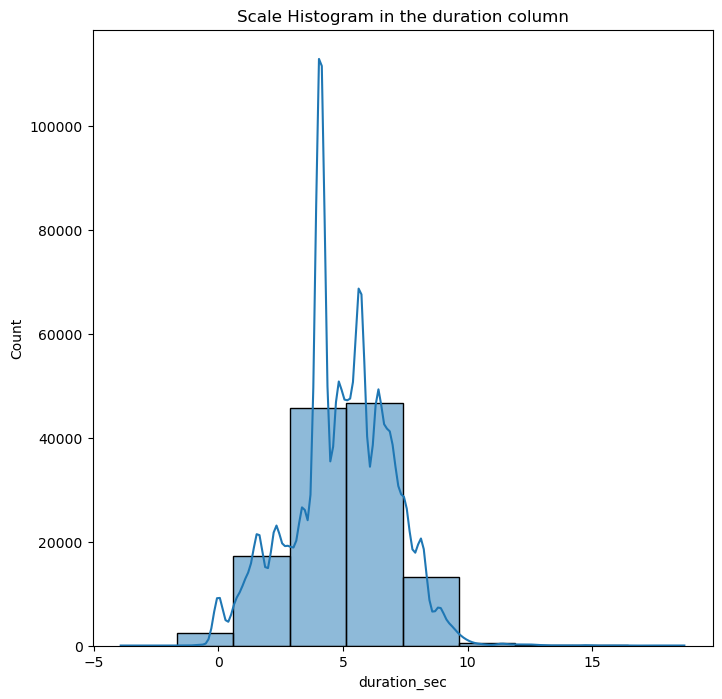

In [37]:
plt.figure(figsize=(6,6))

sns.histplot(x = np.log(ufo_df['duration_sec']), kde=True, bins = 10)
plt.title('Scale Histogram in the duration column')

Let's take a look if the maximum and maximum values correspond to the original duration column. 

In [38]:
# Original duration column, New duration column and text  when new duration column is the maximum value.
ufo_df.loc[
    ufo_df[ufo_df['duration_sec'] == ufo_df['duration_sec'].min()].index,
    ['Duration', 'duration_sec','Text']].values

array([['0.02 sec', 0.02,
        "High speed moving fireball fallow by a bright tail . \nI have seen on my security monitor's screen for a fraction of second a bright ball of light moving with high speed trough visible angle of the security video camera. \nThe event has been recorded on tape by permanent recording system. After that I clapped the event to separate the importance frames. The clip can be visibly on the internet. In my opinion the object looks like a meteorite. The angle is almost parallel to the ground video camera B/W is at 3 feet high from the ground."],
       ['0.02 seconds', 0.02,
        'Saw blue object as it passed in sky over apartments ... only for a few seconds before it disappeared into the clouds \n((NUFORC Note:  Witness elects to remain totally anonymous; provides no contact information.  PD))']],
      dtype=object)

In [39]:
# Original duration column, New duration column and text  when new duration column is the minimum value.
ufo_df.loc[
    ufo_df[ufo_df['duration_sec'] == ufo_df['duration_sec'].min()].index,
    ['Duration', 'duration_sec','Text']].values

array([['0.02 sec', 0.02,
        "High speed moving fireball fallow by a bright tail . \nI have seen on my security monitor's screen for a fraction of second a bright ball of light moving with high speed trough visible angle of the security video camera. \nThe event has been recorded on tape by permanent recording system. After that I clapped the event to separate the importance frames. The clip can be visibly on the internet. In my opinion the object looks like a meteorite. The angle is almost parallel to the ground video camera B/W is at 3 feet high from the ground."],
       ['0.02 seconds', 0.02,
        'Saw blue object as it passed in sky over apartments ... only for a few seconds before it disappeared into the clouds \n((NUFORC Note:  Witness elects to remain totally anonymous; provides no contact information.  PD))']],
      dtype=object)

As we can see above the result column could capture the minumum and maximum values correctly. 

In [40]:
# Remove unnecessary columns from the data
ufo_df['Duration'] = ufo_df['duration_sec']
ufo_df.drop(columns=['duration_sec'], inplace=True)

### Text column

In the text column we have comments from the Nuforc organization with the following pattern: (("SOME TEXT")). To treat it we will create a new functions to remove it. 

In [41]:
# Remove comments from the text. 
ufo_df['Text'] = ufo_df['Text'].apply(remove_comment)

### Final Result

In [42]:
ufo_df.sample(10)

,Date,City,State,Country,Shape,Duration,Image,Link,Summary,Text,Year,Month,Day_of_Month,Day_of_Week,Day_Name,Hour
6828,1995-06-15 23:00:00,Pawleys island,SC,USA,Unknown,300.0,No,https://nuforc.org/webreports/reports/080/S807...,Object spotted at boat storage.,Object spotted at boat storage. \nA boyfriend ...,1995.0,6.0,15.0,3.0,Thursday,23.0
13575,2007-12-01 00:15:00,Stateline/minden,NV,USA,Unknown,60.0,No,https://nuforc.org/webreports/reports/060/S601...,"Unusually bright light in sky, moving erratica...","Unusually bright light in sky, moving erratica...",2007.0,12.0,1.0,5.0,Saturday,0.0
19612,1997-10-20 08:45:00,Gig harbor,WA,USA,Light,30.0,No,https://nuforc.org/webreports/reports/084/S849...,I saw my first UFO when I was on my way to sch...,I saw my first UFO when I was on my way to sch...,1997.0,10.0,20.0,0.0,Monday,8.0
66869,2011-09-05 22:30:00,Riverside,CA,USA,Light,4.0,No,https://nuforc.org/webreports/reports/083/S837...,White dot flying at high speed on Labor Day ev...,White dot flying at high speed on Labor Day ev...,2011.0,9.0,5.0,0.0,Monday,22.0
39172,2004-08-19 17:00:00,Minneapolis,MN,USA,Unknown,60.0,No,https://nuforc.org/webreports/reports/039/S391...,The round object above the Metrodome.,The round object above the Metrodome. \nIt was...,2004.0,8.0,19.0,3.0,Thursday,17.0
125034,2016-09-16 21:00:00,Grayling,MI,USA,Unknown,9.0,No,https://nuforc.org/webreports/reports/130/S130...,We were in our house when 3 bright orange flas...,We were in our house when 3 bright orange flas...,2016.0,9.0,16.0,4.0,Friday,21.0
56189,2001-07-15 00:30:00,Newark,NJ,USA,Formation,300.0,No,https://nuforc.org/webreports/reports/018/S184...,Amazing Siting,Amazing Siting \nIt all happened on July 15 at...,2001.0,7.0,15.0,6.0,Sunday,0.0
10982,1999-06-01 02:00:00,Rowland heights,CA,USA,Light,5.0,No,https://nuforc.org/webreports/reports/072/S727...,"A stable bright light, larger than anything pr...","A stable bright light, larger than anything pr...",1999.0,6.0,1.0,1.0,Tuesday,2.0
11515,1990-06-30 20:30:00,Scottsdale,AZ,USA,Triangle,600.0,No,https://nuforc.org/webreports/reports/049/S498...,PHOENIX LIGHT OVER SCOTTSDALE IN 1991,PHOENIX LIGHT OVER SCOTTSDALE IN 1991 \nI HAVE...,1990.0,6.0,30.0,5.0,Saturday,20.0
68143,2001-04-29 21:13:00,Memphis,TN,USA,Unknown,180.0,No,https://nuforc.org/webreports/reports/017/S174...,the star at the top and at the bottom right we...,the star at the top and at the bottom right we...,2001.0,4.0,29.0,6.0,Sunday,21.0


## Part 2 - Data Analysis

- what city with the most ufo sights?
- what state with the most ufo sights?
- What is the most common shape of ufos?
- How does ufo sights behave over time?


### what cities with the most ufo sights?


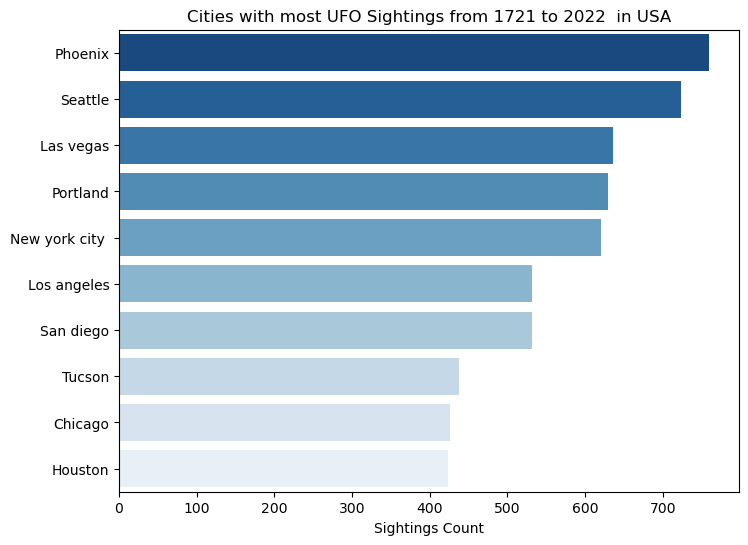

In [43]:
plt.figure(figsize=(8,6))
top_city = ufo_df.City.value_counts().nlargest(10)


sns.barplot(x=top_city, y=top_city.index, palette='Blues_r')
plt.xlabel('Sightings Count')
plt.title('Cities with most UFO Sightings from {:.0f} to {:.0f}  in USA'.format(ufo_df.Date.dt.year.min(), ufo_df.Date.dt.year.max()));

### what state with the most ufo sights?


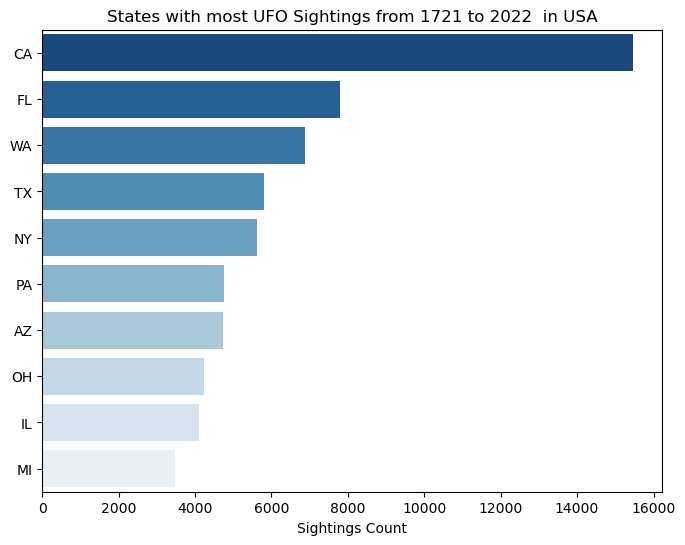

In [44]:
plt.figure(figsize=(8,6))
top_state = ufo_df.State.value_counts().nlargest(10)


sns.barplot(x=top_state, y=top_state.index, palette='Blues_r')
plt.xlabel('Sightings Count')
plt.title('States with most UFO Sightings from {:.0f} to {:.0f}  in USA'.format(ufo_df.Date.dt.year.min(), ufo_df.Date.dt.year.max()));

### What is the most common shape of ufos?


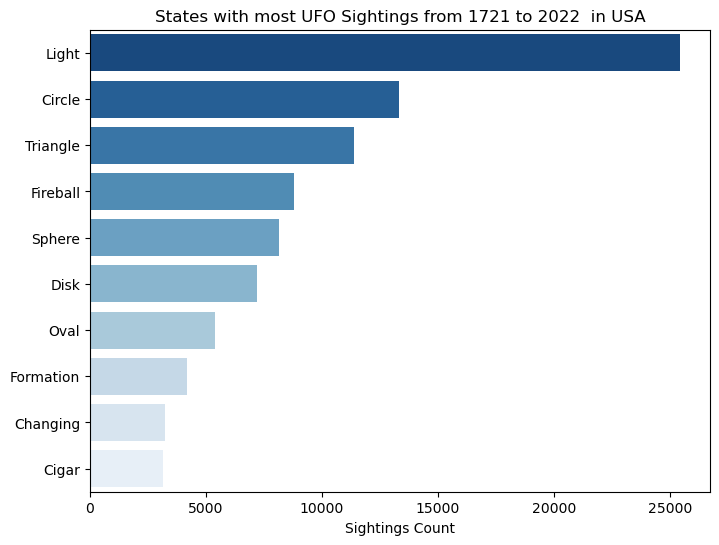

In [45]:
plt.figure(figsize=(8,6))
top_shape = ufo_df.loc[~ufo_df.Shape.isin(['Unknown'])].Shape.value_counts().nlargest(10)


sns.barplot(x=top_shape, y=top_shape.index, palette='Blues_r')
plt.xlabel('Sightings Count')
plt.title('States with most UFO Sightings from {:.0f} to {:.0f}  in USA'.format(ufo_df.Date.dt.year.min(), ufo_df.Date.dt.year.max()));

### How does ufo sights behave per year and Month?

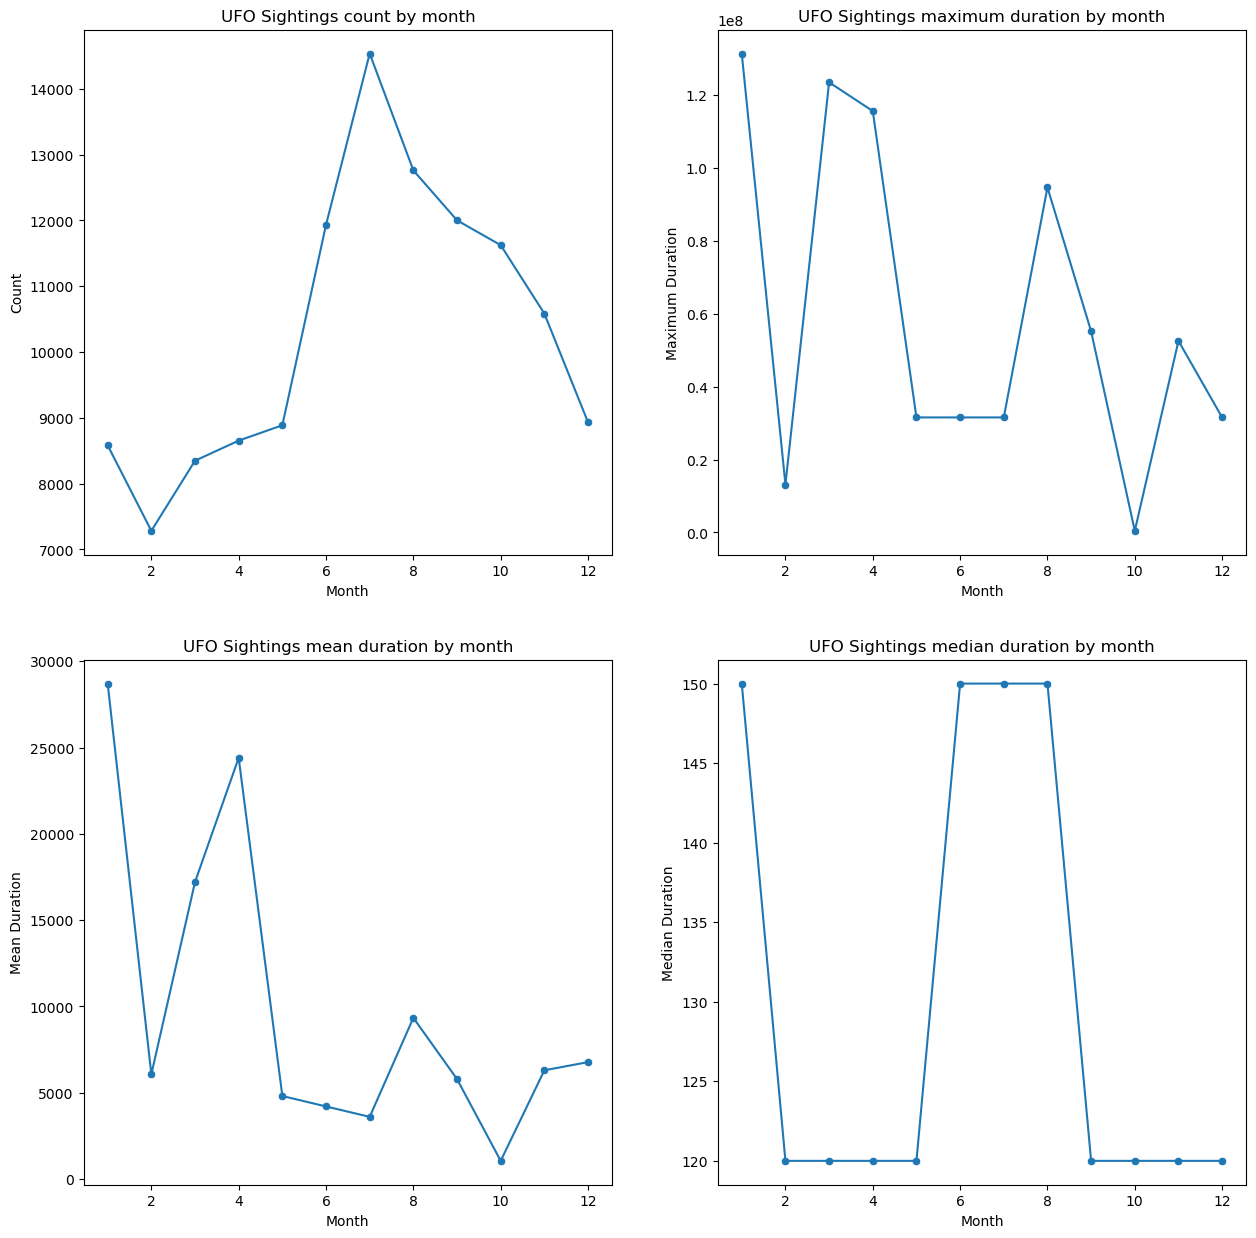

In [46]:
sightings_count = ufo_df.groupby('Month').count().reset_index()
month_mean = ufo_df.groupby('Month').Duration.mean().reset_index()
month_median = ufo_df.groupby('Month').Duration.median().reset_index()
month_max = ufo_df.groupby('Month').Duration.max().reset_index()




fig, axs = plt.subplots(2, 2, figsize=(15, 15))

fig1 = sns.scatterplot(x = "Month", y = "Duration", data = sightings_count, ax=axs[0,0])
sns.lineplot(x = "Month", y = "Duration", data = sightings_count, ax=axs[0,0])

fig1.set_xlabel('Month')
fig1.set_ylabel('Count')
fig1.set_title('UFO Sightings count by month')



fig2 = sns.scatterplot(x = "Month", y = "Duration", data = month_mean, ax=axs[1,0])
sns.lineplot(x = "Month", y = "Duration", data = month_mean, ax=axs[1,0])

fig2.set_xlabel('Month')
fig2.set_ylabel('Mean Duration')
fig2.set_title('UFO Sightings mean duration by month')



fig3 = sns.scatterplot(x = "Month", y = "Duration", data = month_median, ax=axs[1,1])
sns.lineplot(x = "Month", y = "Duration", data = month_median, ax=axs[1,1])

fig3.set_xlabel('Month')
fig3.set_ylabel('Median Duration')
fig3.set_title('UFO Sightings median duration by month')



fig4 = sns.scatterplot(x = "Month", y = "Duration", data = month_max, ax=axs[0,1])
sns.lineplot(x = "Month", y = "Duration", data = month_max, ax=axs[0,1])

fig4.set_xlabel('Month')
fig4.set_ylabel('Maximum Duration')
fig4.set_title('UFO Sightings maximum duration by month');


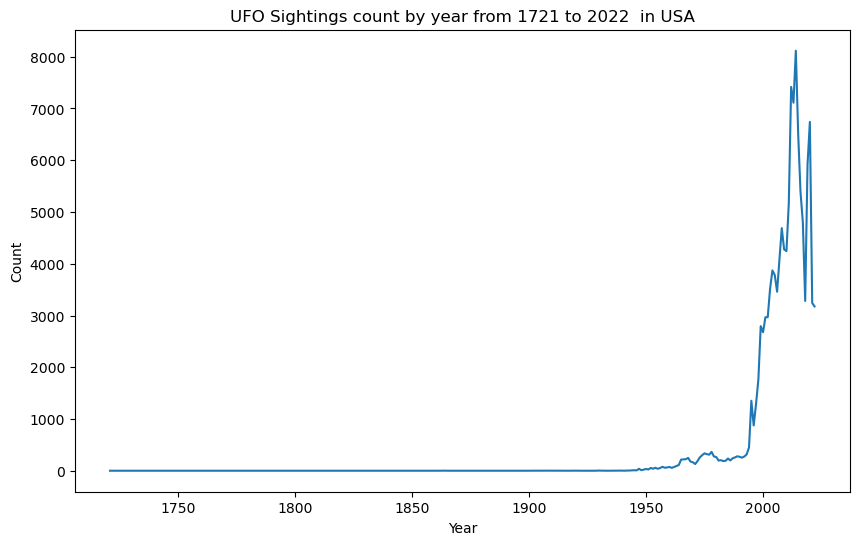

In [47]:
plt.figure(figsize=(10, 6))

sightings_count = ufo_df.groupby('Year').count().reset_index()


fig1 = sns.lineplot(x = "Year", y = "Duration", data = sightings_count)


fig1.set_xlabel('Year')
fig1.set_ylabel('Count')
fig1.set_title('UFO Sightings count by year from {:.0f} to {:.0f}  in USA'.format(ufo_df.Date.dt.year.min(), ufo_df.Date.dt.year.max()))

plt.show()

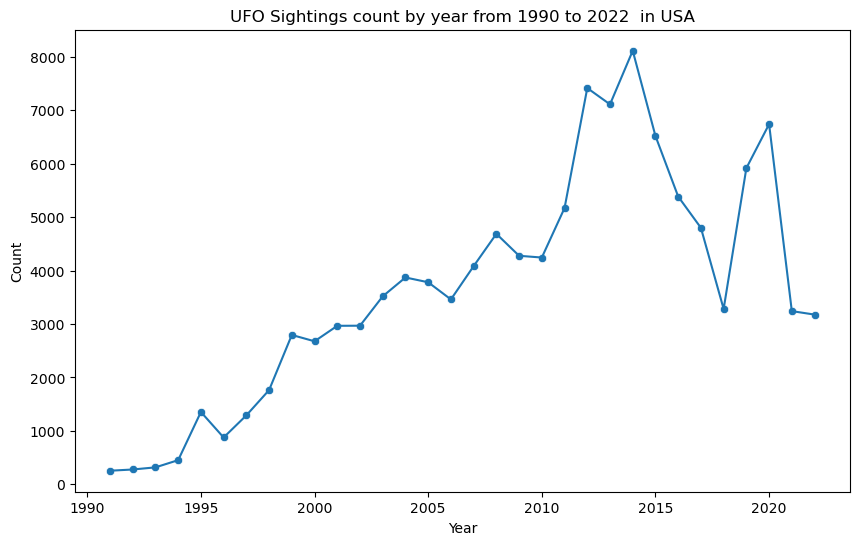

In [48]:
plt.figure(figsize=(10, 6))

# start year used in the plot 
year_figure = 1990

sightings_count = ufo_df.loc[ufo_df.Year > year_figure].groupby('Year').count().reset_index()


fig1 = sns.lineplot(x = "Year", y = "Duration", data = sightings_count)
sns.scatterplot(x = "Year", y = "Duration", data = sightings_count)

fig1.set_xlabel('Year')
fig1.set_ylabel('Count')
fig1.set_title('UFO Sightings count by year from {:.0f} to {:.0f}  in USA'.format(year_figure, ufo_df.Date.dt.year.max()))

plt.show()

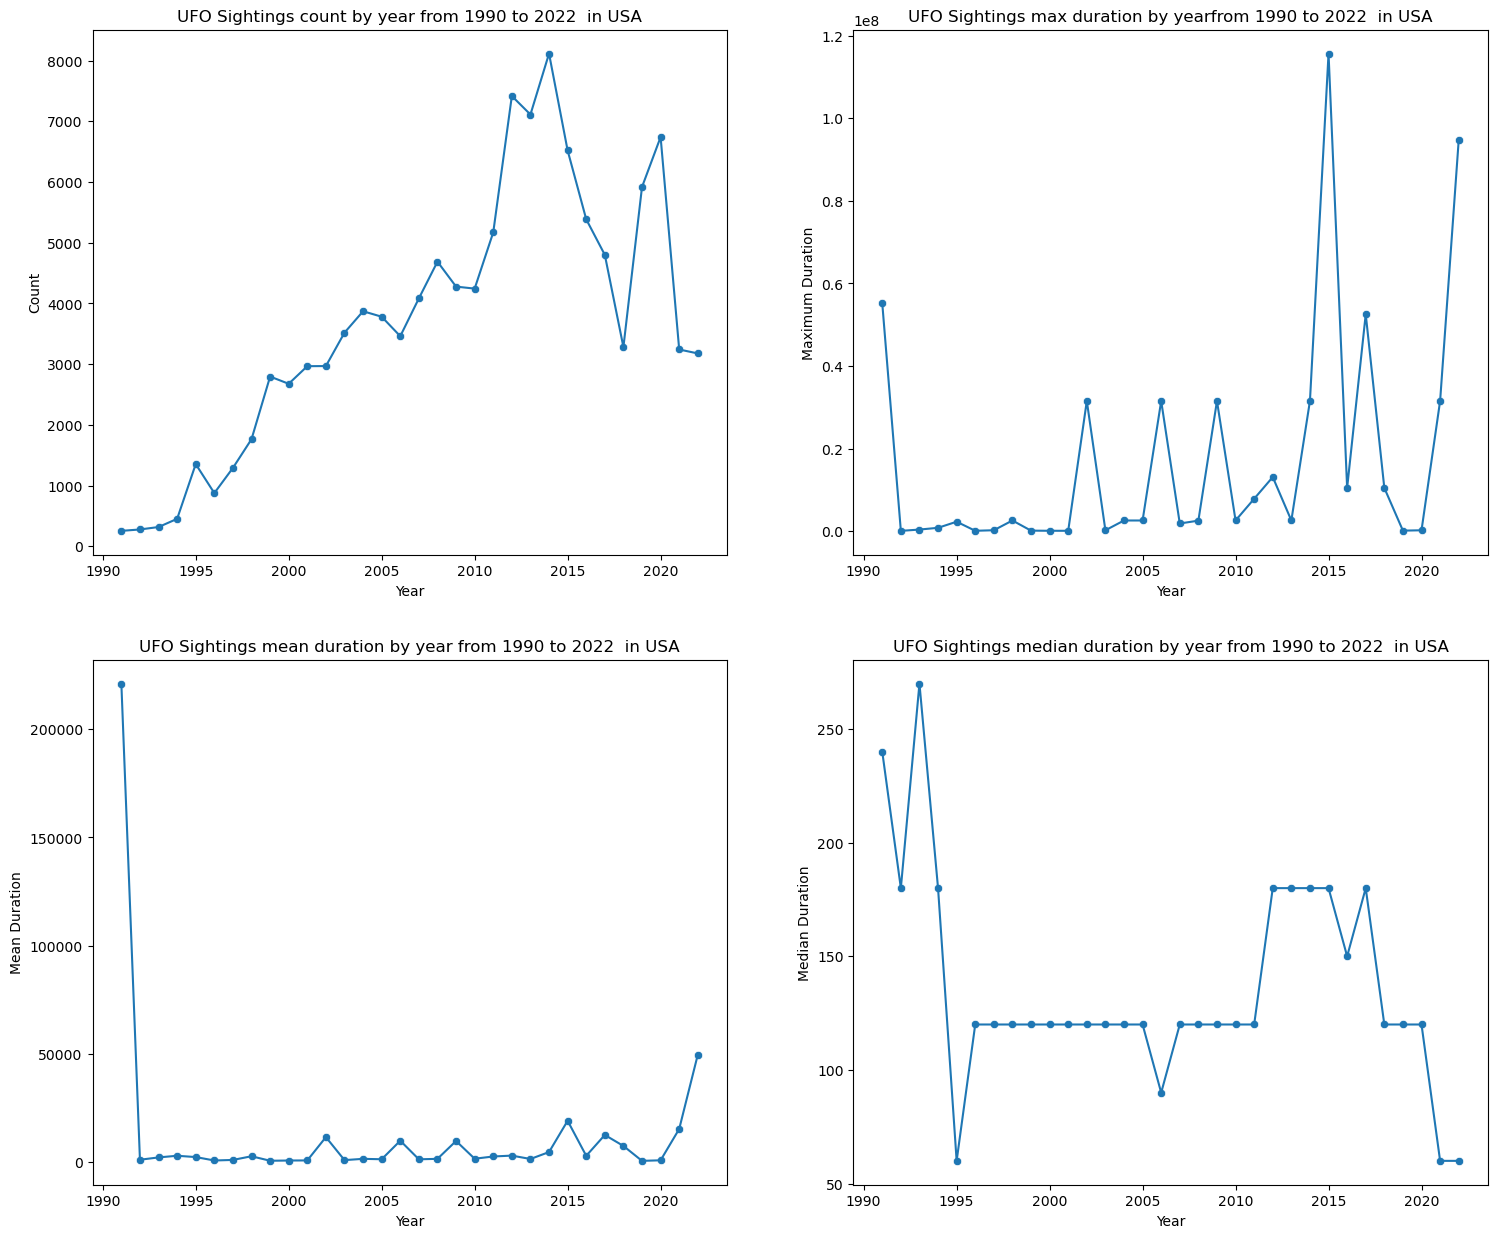

In [49]:
# start year used in the plot 
year_figure = 1990

sightings_count = ufo_df.loc[ufo_df.Year > year_figure].groupby('Year').count().reset_index()
year_mean = ufo_df.loc[ufo_df.Year > year_figure].groupby('Year').Duration.mean().reset_index()
year_median = ufo_df.loc[ufo_df.Year > year_figure].groupby('Year').Duration.median().reset_index()
year_max = ufo_df.loc[ufo_df.Year > year_figure].groupby('Year').Duration.max().reset_index()




fig, axs = plt.subplots(2, 2, figsize=(18, 15))

fig1 = sns.scatterplot(x = "Year", y = "Duration", data = sightings_count, ax=axs[0,0])
sns.lineplot(x = "Year", y = "Duration", data = sightings_count, ax=axs[0,0])

fig1.set_xlabel('Year')
fig1.set_ylabel('Count')
fig1.set_title('UFO Sightings count by year from {:.0f} to {:.0f}  in USA'.format(year_figure, ufo_df.Date.dt.year.max()))



fig2 = sns.scatterplot(x = "Year", y = "Duration", data = year_mean, ax=axs[1,0])
sns.lineplot(x = "Year", y = "Duration", data = year_mean, ax=axs[1,0])

fig2.set_xlabel('Year')
fig2.set_ylabel('Mean Duration')
fig2.set_title('UFO Sightings mean duration by year from {:.0f} to {:.0f}  in USA'.format(year_figure, ufo_df.Date.dt.year.max()))



fig3 = sns.scatterplot(x = "Year", y = "Duration", data = year_median, ax=axs[1,1])
sns.lineplot(x = "Year", y = "Duration", data = year_median, ax=axs[1,1])

fig3.set_xlabel('Year')
fig3.set_ylabel('Median Duration')
fig3.set_title('UFO Sightings median duration by year from {:.0f} to {:.0f}  in USA'.format(year_figure, ufo_df.Date.dt.year.max()))



fig4 = sns.scatterplot(x = "Year", y = "Duration", data = year_max, ax=axs[0,1])
sns.lineplot(x = "Year", y = "Duration", data = year_max, ax=axs[0,1])

fig4.set_xlabel('Year')
fig4.set_ylabel('Maximum Duration')
fig4.set_title('UFO Sightings max duration by yearfrom {:.0f} to {:.0f}  in USA'.format(year_figure, ufo_df.Date.dt.year.max()));
